In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import seaborn as sns

# Data loading

In [ ]:
#https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol
url = 'https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-full.csv'
dataset = pd.read_csv(url)
print(dataset.shape)
dataset.info()


# Data pre processing

In [3]:
dataset = dataset.drop(columns=['formacao_mandante','formacao_visitante','tecnico_mandante','tecnico_visitante','rodata'])

In [4]:
dataset['data'] = dataset['data'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y',errors='ignore'))

In [5]:
dataset['ano'] = dataset["data"].dt.year

# Ajustar o valor do campo "ano" para jogos no intervalo específico de datas por conta da pandemia
mask = (dataset["data"] > "2021-01-01") & (dataset["data"] < "2021-02-26")
dataset.loc[mask, "ano"] = 2020

In [6]:
coordenadas_estados = {
    'AC': (-9.9746, -67.8074),    # Rio Branco, Acre
    'AL': (-9.6498, -35.7089),    # Maceió, Alagoas
    'AP': (0.0356, -51.0600),     # Macapá, Amapá
    'AM': (-3.4653, -62.2159),    # Manaus, Amazonas
    'BA': (-12.9716, -38.5014),   # Salvador, Bahia
    'CE': (-3.7172, -38.5433),    # Fortaleza, Ceará
    'DF': (-15.7801, -47.9292),   # Brasília, Distrito Federal
    'ES': (-20.3155, -40.3128),   # Vitória, Espírito Santo
    'GO': (-16.6799, -49.2550),   # Goiânia, Goiás
    'MA': (-2.5387, -44.2827),    # São Luís, Maranhão
    'MT': (-15.5989, -56.0949),   # Cuiabá, Mato Grosso
    'MS': (-20.4646, -54.6156),   # Campo Grande, Mato Grosso do Sul
    'MG': (-19.9025, -43.9369),   # Belo Horizonte, Minas Gerais
    'PA': (-1.4550, -48.4898),    # Belém, Pará
    'PB': (-7.1151, -34.8641),    # João Pessoa, Paraíba
    'PR': (-25.4195, -49.2646),   # Curitiba, Paraná
    'PE': (-8.0476, -34.8770),    # Recife, Pernambuco
    'PI': (-5.0939, -42.8010),    # Teresina, Piauí
    'RJ': (-22.9083, -43.1964),   # Rio de Janeiro, Rio de Janeiro
    'RN': (-5.7945, -35.2110),    # Natal, Rio Grande do Norte
    'RS': (-30.0330, -51.2210),   # Porto Alegre, Rio Grande do Sul
    'RO': (-8.7602, -63.8999),    # Porto Velho, Rondônia
    'RR': (2.8199, -60.6715),     # Boa Vista, Roraima
    'SC': (-27.5954, -48.5480),   # Florianópolis, Santa Catarina
    'SP': (-23.5505, -46.6333),   # São Paulo, São Paulo
    'SE': (-10.9472, -37.0731),   # Aracaju, Sergipe
    'TO': (-10.1677, -48.3317)    # Palmas, Tocantins
}

# Função para calcular a distância entre duas coordenadas geográficas
def calcular_distancia(coord1, coord2):
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Raio da Terra em km (aproximadamente)
    raio_terra = 6371.0
    
    distancia = raio_terra * c
    return distancia

# Adicione uma nova coluna 'distancia_percorrida' ao DataFrame
dataset['distancia_percorrida'] = dataset.apply(lambda row: calcular_distancia(
    coordenadas_estados.get(row['mandante_Estado'], (0, 0)),  # Coord. do mandante
    coordenadas_estados.get(row['visitante_Estado'], (0, 0))  # Coord. do visitante
), axis=1)

# Data Analysis

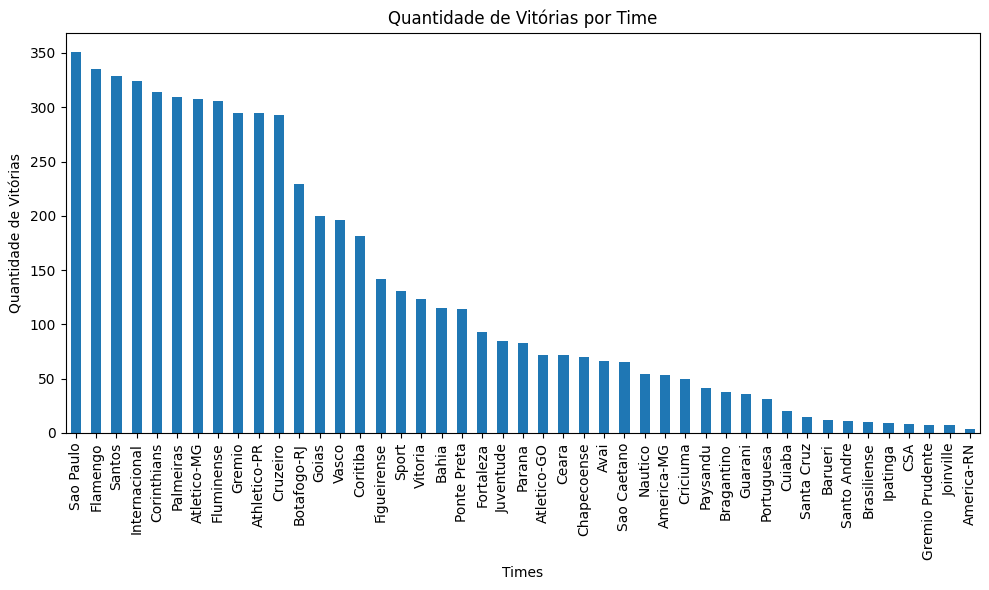

In [7]:
# Contagem de vitórias por time
vitorias_por_time = dataset[dataset["vencedor"] != "-"]["vencedor"].value_counts()

plt.figure(figsize=(10, 6))

vitorias_por_time.plot(kind="bar")
plt.title("Quantidade de Vitórias por Time")
plt.xlabel("Times")
plt.ylabel("Quantidade de Vitórias")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [8]:
dataset.describe()

,ID,data,mandante_Placar,visitante_Placar,ano,distancia_percorrida
count,8025.000000,8025,8025.000000,8025.000000,8025.000000,8025.000000
mean,4013.000000,2012-09-07 16:43:14.691588864,1.547040,1.024922,2012.037134,935.016265
min,1.000000,2003-03-29 00:00:00,0.000000,0.000000,2003.000000,0.000000
25%,2007.000000,2007-06-17 00:00:00,1.000000,0.000000,2007.000000,358.360612
50%,4013.000000,2012-08-16 00:00:00,1.000000,1.000000,2012.000000,748.991953
75%,6019.000000,2017-10-15 00:00:00,2.000000,2.000000,2017.000000,1343.726300
max,8025.000000,2022-11-13 00:00:00,7.000000,7.000000,2022.000000,3215.675619
std,2316.762288,NaN,1.232277,1.024076,5.944355,760.857999


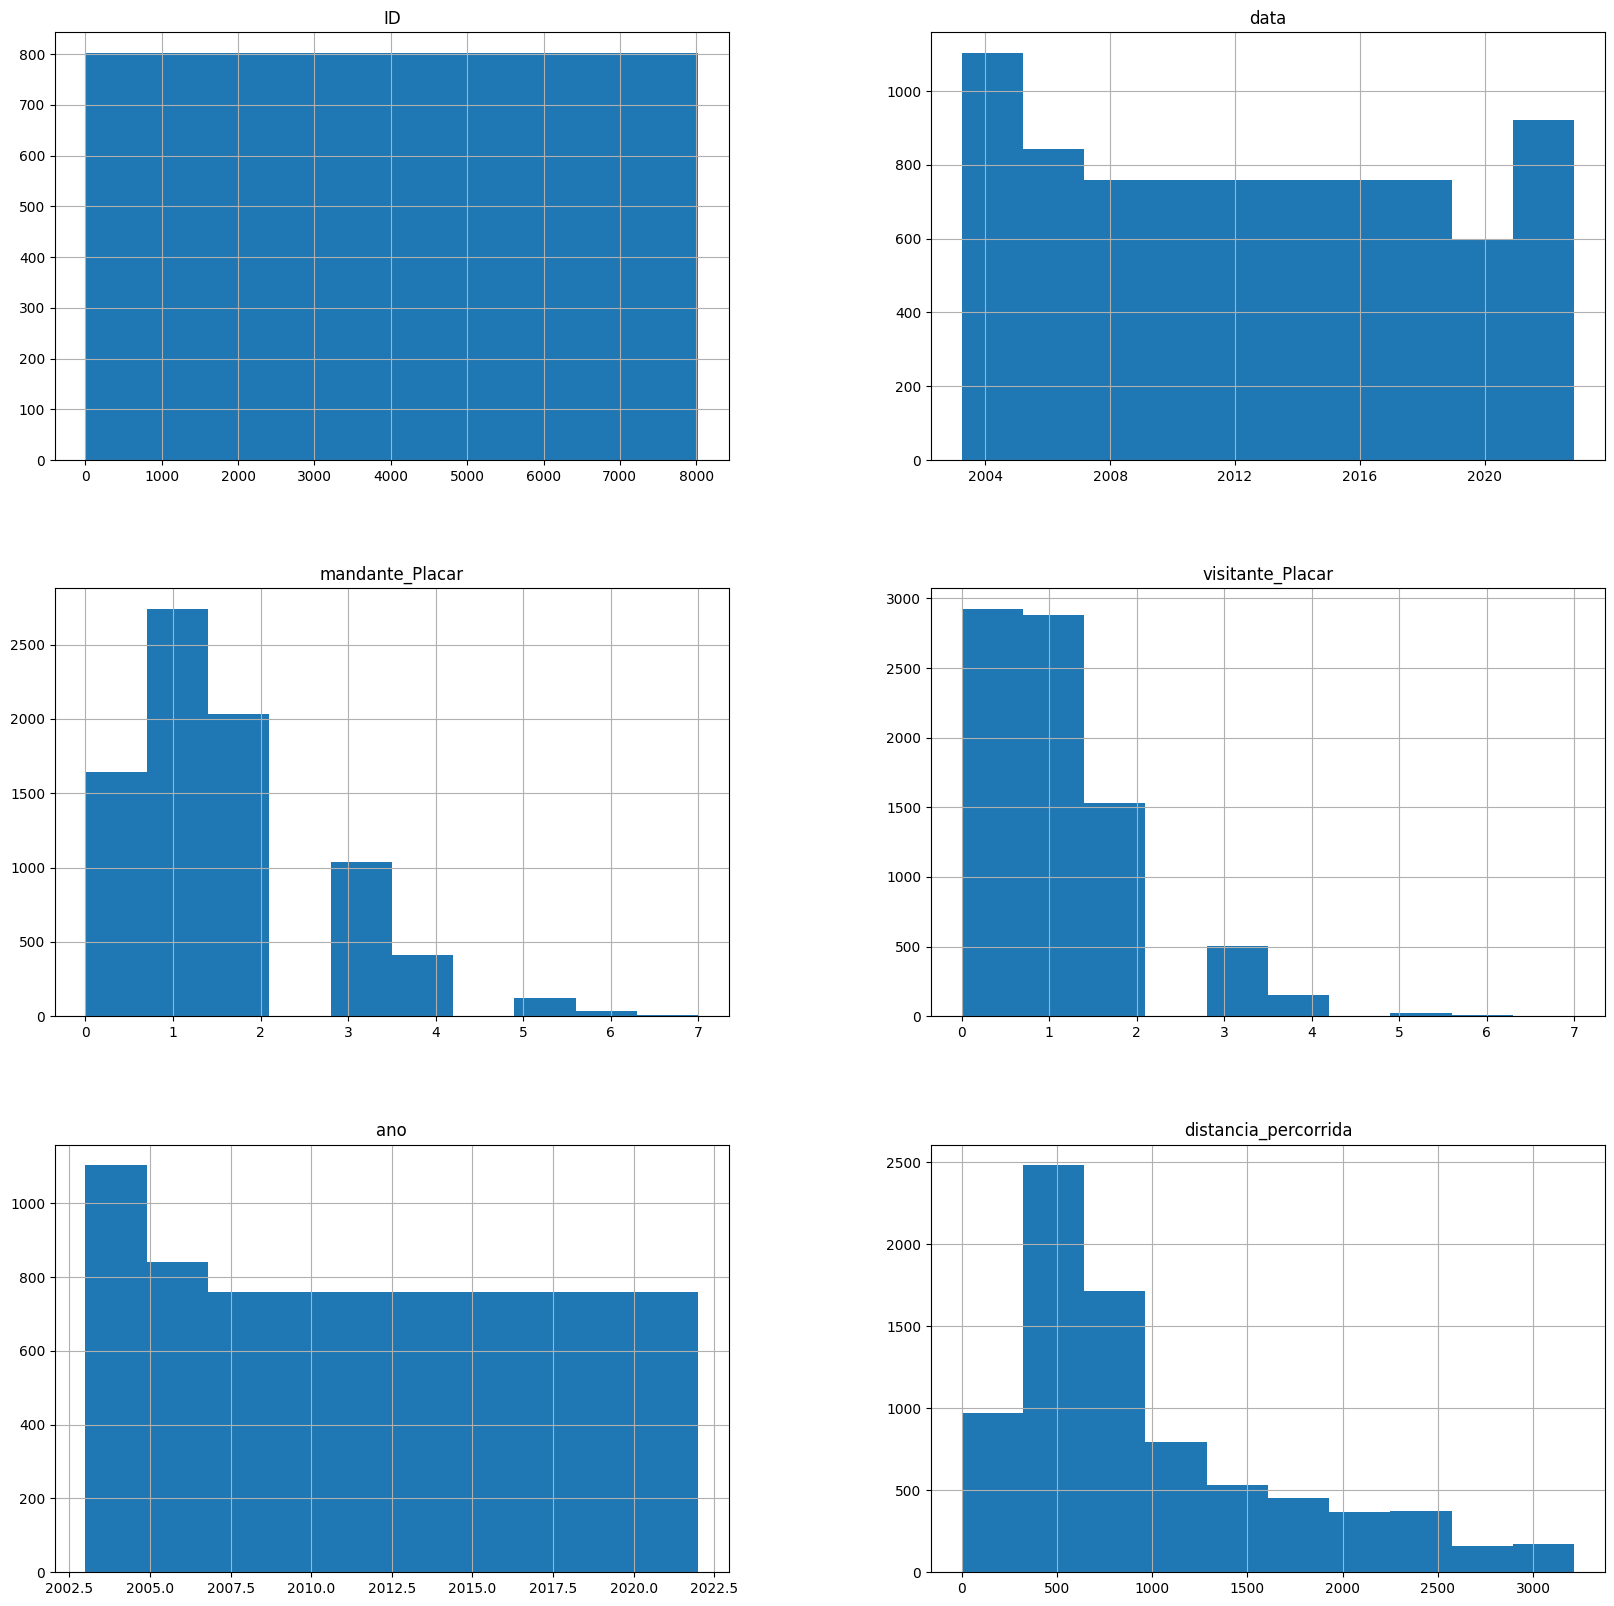

In [9]:
dataset.hist(figsize=(20,20));

<Figure size 3000x1500 with 0 Axes>

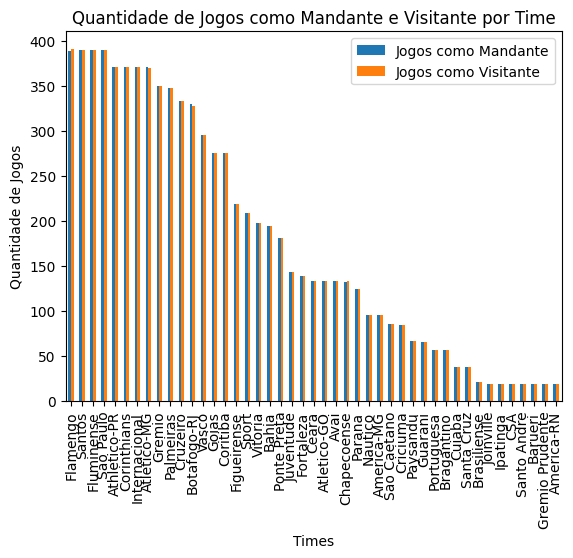

In [18]:
# Contagem de jogos como mandante
mandante_counts = dataset["mandante"].value_counts()

# Contagem de jogos como visitante
visitante_counts = dataset["visitante"].value_counts()

# Combina as contagens em um DataFrame único
total_counts = pd.concat([mandante_counts, visitante_counts], axis=1, sort=True)
total_counts.columns = ["Jogos como Mandante", "Jogos como Visitante"]
total_counts = total_counts.fillna(0)  # Preenche valores nulos com 0

# Ordena o DataFrame pelas contagens totais (soma de jogos como mandante e visitante)
total_counts["Total de Jogos"] = total_counts["Jogos como Mandante"] + total_counts["Jogos como Visitante"]
total_counts = total_counts.sort_values(by="Total de Jogos", ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(30, 15))
total_counts.plot(kind="bar", y=["Jogos como Mandante", "Jogos como Visitante"])
plt.title("Quantidade de Jogos como Mandante e Visitante por Time")
plt.xlabel("Times")
plt.ylabel("Quantidade de Jogos")
plt.show()

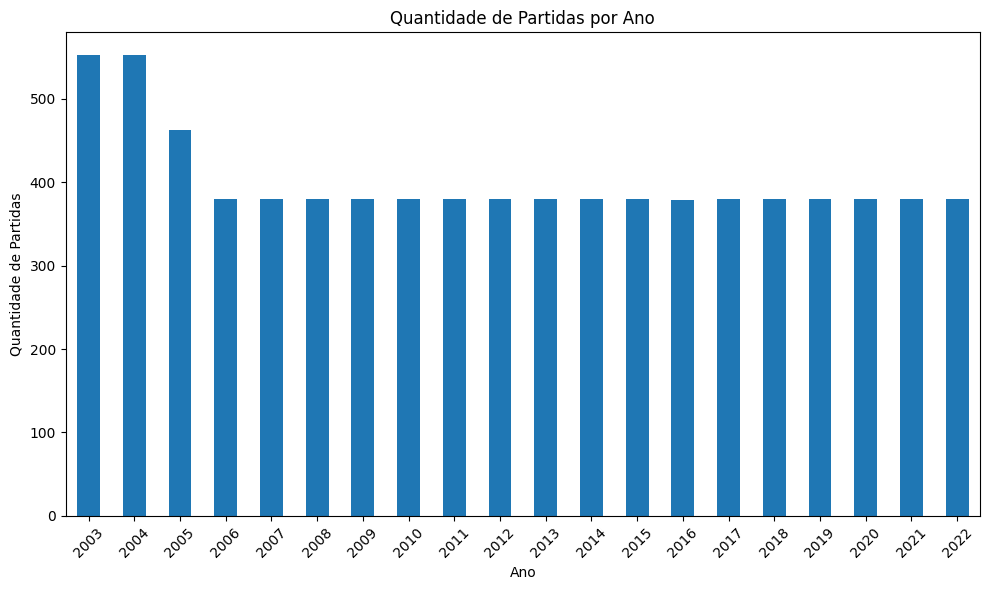

In [10]:
partidas_por_ano = dataset["ano"].value_counts().sort_index()

plt.figure(figsize=(10, 6))

partidas_por_ano.plot(kind="bar")
plt.title("Quantidade de Partidas por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Partidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


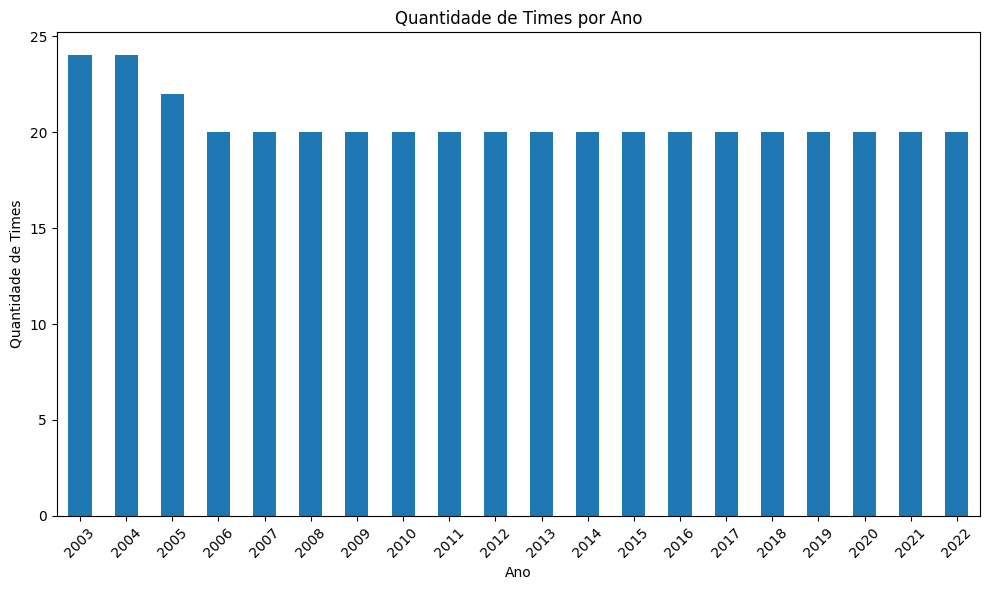

In [11]:
# Contagem de times únicos por ano
times_por_ano = dataset.groupby("ano")["visitante"].nunique()

plt.figure(figsize=(10, 6))

times_por_ano.plot(kind="bar")
plt.title("Quantidade de Times por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Times")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 14))
sns.heatmap(dataset.corr(),annot=True, cmap=plt.cm.Reds,annot_kws={"fontsize":12});
plt.show()